In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv('D:/lh_data/kaggle/melb_data.csv')

# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [2]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


# Pipelines

### Step 1: Define Preprocessing Steps

Similar to how a pipeline bundles together preprocessing and modeling steps, we use the ColumnTransformer class to bundle together different preprocessing steps. The code below:

* imputes missing values in numerical data, and
* imputes missing values and applies a one-hot encoding to categorical data.

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

### Step 2: Define the Model
Next, we define a random forest model with the familiar RandomForestRegressor class.

In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

### Step 3: Create and Evaluate the Pipeline

Finally, we use the Pipeline class to define a pipeline that bundles the preprocessing and modeling steps. There are a few important things to notice:

* With the pipeline, we preprocess the training data and fit the model in a single line of code. (In contrast, without a pipeline, we have to do imputation, one-hot encoding, and model training in separate steps. This becomes especially messy if we have to deal with both numerical and categorical variables!)
* With the pipeline, we supply the unprocessed features in X_valid to the predict() command, and the pipeline automatically preprocesses the features before generating predictions. (However, without a pipeline, we have to remember to preprocess the validation data before making predictions.)

In [6]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 160679.18917034855


# Exercise Pipeline

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('D:/lh_data/kaggle/train.csv', index_col='Id')
X_test_full = pd.read_csv('D:/lh_data/kaggle/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) ])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols) ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)  ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17861.780102739725


In [9]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape  )

(1168, 76) (292, 76) (1168,) (292,)


## Step 1: Improve the performance

Test several hyperparameters
remove columns with a big percentage of nan


In [10]:
# new numerical list

numerical_cols2 = list( set(numerical_cols) - set(['LotFrontage']) )

In [11]:
# new categorical list

threshold = 33  # arbitrary percentage
categorical_cols2 = []
for i in categorical_cols:                                      
    null_rate = X_train[i].isna().sum() / len(X_train) * 100    
    if null_rate < threshold :
        categorical_cols2.append(i)                             
    else:
        print("{} null rate: {}%".format(i,round(null_rate,2))) # percent display of missing values

Alley null rate: 93.92%
FireplaceQu null rate: 47.17%
PoolQC null rate: 99.66%
Fence null rate: 81.68%
MiscFeature null rate: 95.8%


In [12]:
my_cols2 =  categorical_cols2 + numerical_cols2

In [13]:
# X_train = X_train_full[my_cols2].copy()
# X_valid = X_valid_full[my_cols2].copy()
# X_test = X_test_full[my_cols2].copy()

In [14]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape  )

(1168, 76) (292, 76) (1168,) (292,)


In [15]:
# IMPUTATION AND ONEHOTENCODER FOR CATEGORICAL

# Imputation
my_imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train[categorical_cols2]))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid[categorical_cols2]))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train[categorical_cols2].columns
imputed_X_valid.columns = X_valid[categorical_cols2].columns

# Imputation removed  index; put it back
imputed_X_train.index = X_train[categorical_cols2].index
imputed_X_valid.index = X_valid[categorical_cols2].index

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(imputed_X_train))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(imputed_X_valid))

# # One-hot encoding removed index; put it back
OH_cols_train.index = imputed_X_train.index
OH_cols_valid.index = imputed_X_valid.index



In [16]:
# IMPUTATION FOR NUMERICAL

# Fill in the lines below: imputation
my_imputer = SimpleImputer(strategy='median') # Your code here   MEDIAN WORKS BETTER THAN MEAN IN THIS EXAMPLE
imputed_X_train_num = pd.DataFrame(my_imputer.fit_transform(X_train[numerical_cols2]))
imputed_X_valid_num = pd.DataFrame(my_imputer.transform(X_valid[numerical_cols2]))

# Imputation removed column names; put them back
imputed_X_train_num.columns = X_train[numerical_cols2].columns
imputed_X_valid_num.columns = X_valid[numerical_cols2].columns

# Imputation removed  index; put it back
imputed_X_train_num.index = X_train[numerical_cols2].index
imputed_X_valid_num.index = X_valid[numerical_cols2].index


In [17]:
# # Add one-hot encoded columns to numerical features
X_train_improved = pd.concat( [imputed_X_train_num, OH_cols_train], axis=1)
X_valid_improved = pd.concat( [imputed_X_valid_num, OH_cols_valid], axis=1)

print('3:', X_train.shape, X_valid.shape, X_train_improved.shape, X_valid_improved.shape, y_train.shape, y_valid.shape  )

3: (1168, 76) (292, 76) (1168, 209) (292, 209) (1168,) (292,)


In [18]:
X_train_improved.isna().sum()

OverallQual     0
TotRmsAbvGrd    0
FullBath        0
YearBuilt       0
OpenPorchSF     0
               ..
169             0
170             0
171             0
172             0
173             0
Length: 209, dtype: int64

In [19]:
# TEST A FEW MODELS

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

# Function for comparing different models
def score_model(model, X_t=X_train_improved, X_v=X_valid_improved, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 17792
Model 2 MAE: 17858
Model 3 MAE: 17633
Model 4 MAE: 18158
Model 5 MAE: 18412


## Improved Results

In [20]:
my_cols2 =  categorical_cols2 + numerical_cols2

In [21]:
X_train = X_train_full[my_cols2].copy()
X_valid = X_valid_full[my_cols2].copy()
X_test = X_test_full[my_cols2].copy()

In [22]:
# Preprocessing for numerical data
numerical_transformer2 = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)) ])

# Bundle preprocessing for numerical and categorical data
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer2, numerical_cols2),
        ('cat', categorical_transformer2, categorical_cols2) ])

# Define model
model2 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf2 = Pipeline(steps=[('preprocessor', preprocessor2),
                      ('model', model2)  ])

# Preprocessing of training data, fit model 
clf2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds2 = clf2.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds2))

MAE: 17633.599760273974


In [25]:
# Preprocessing of test data, fit model
preds_test = clf2.predict(X_test) # Your code here


In [26]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('D:/lh_data/kaggle/pipelines_submission.csv', index=False)

# CROSS VALIDATION

in cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".

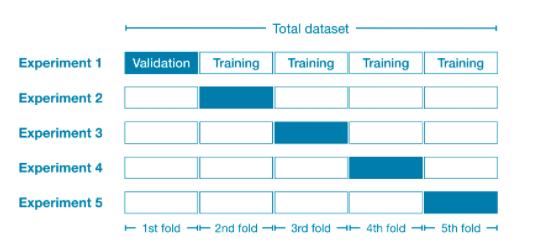



Then, we run one experiment for each fold:

* In Experiment 1, we use the first fold as a validation (or holdout) set and everything else as training data. This gives us a measure of model quality based on a 20% holdout set.
* In Experiment 2, we hold out data from the second fold (and use everything except the second fold for training the model). The holdout set is then used to get a second estimate of model quality.
We repeat this process, using every fold once as the holdout set. Putting this together, 100% of the data is used as holdout at some point, and we end up with a measure of model quality that is based on all of the rows in the dataset (even if we don't use all rows simultaneously).

## When should you use cross-validation?

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.
There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

In [1]:
import pandas as pd

# Read the data
data = pd.read_csv('D:/lh_data/kaggle/melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

In [2]:
X.head()

,Rooms,Distance,Landsize,BuildingArea,YearBuilt
0,2,2.5,202.0,NaN,NaN
1,2,2.5,156.0,79.0,1900.0
2,3,2.5,134.0,150.0,1900.0
3,3,2.5,94.0,NaN,NaN
4,4,2.5,120.0,142.0,2014.0


In [3]:
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

Then, we define a pipeline that uses an imputer to fill in missing values and a random forest model to make predictions.

While it's possible to do cross-validation without pipelines, it is quite difficult! Using a pipeline will make the code remarkably straightforward.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))  ])

In [5]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


It is a little surprising that we specify negative MAE. Scikit-learn has a convention where all metrics are defined so a high number is better. Using negatives here allows them to be consistent with that convention, though negative MAE is almost unheard of elsewhere.

In [6]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
277707.3795913405


# Exercise

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('D:/lh_data/kaggle/train.csv', index_col='Id')
test_data = pd.read_csv('D:/lh_data/kaggle/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [10]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer   # replace missing values in the data

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [12]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


In [14]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))])
    
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')

    return scores.mean()

In [15]:
print("Average MAE score:", get_score(50))

Average MAE score: 18353.8393511688


### Test different parameter values

In [18]:
import numpy as np
results={}
for i in np.arange(50,450,50):
    #print(i)
    results[i]=get_score(i)
print(results)

{50: 18353.8393511688, 100: 18395.2151680032, 150: 18288.730020956387, 200: 18248.345889801505, 250: 18255.26922247291, 300: 18275.241922621914, 350: 18270.29183308043, 400: 18270.197974402367}


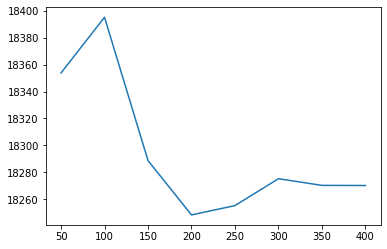

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [23]:
print('Best Estimator:', min(zip(results.values(), results.keys()))[1])

Best Estimator: 200
